## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [46]:
print(f"Есть ли пустые значения: {X.isnull().any().any()}")
print(f"Есть ли категориальные значения: {(X.dtypes=='Object').values.any()}")


Есть ли пустые значения: False
Есть ли категориальные значения: False


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [50]:
X_train_new = X_train[['alcohol', 'magnesium']]
X_test_new = X_test[['alcohol', 'magnesium']]
normalizer = preprocessing.StandardScaler()
normalizer.fit(X_train_new)
X_train_new = normalizer.fit_transform(X_train_new)
X_test_new = normalizer.transform(X_test_new)

In [51]:
neighbours = [1, 3, 5, 10, 15, 25]
models = []
print("NN\tTrain\tTest")
for i in neighbours:
    clf = KNeighborsClassifier(n_neighbors = i, metric="euclidean")
    clf.fit(X_train_new, y_train)
    models.append(clf)
    y_predicted_train = clf.predict(X_train_new)
    y_predicted_test = clf.predict(X_test_new)
    train_rate = np.mean(y_train == y_predicted_train)
    test_rate = np.mean(y_test == y_predicted_test)
    print(f"{i}\t{train_rate:.2f}\t{test_rate:.2f}")

NN	Train	Test
1	1.00	0.67
3	0.80	0.65
5	0.80	0.63
10	0.79	0.65
15	0.77	0.63
25	0.76	0.57


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [52]:
!pip install mlxtend==0.19.00

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [53]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

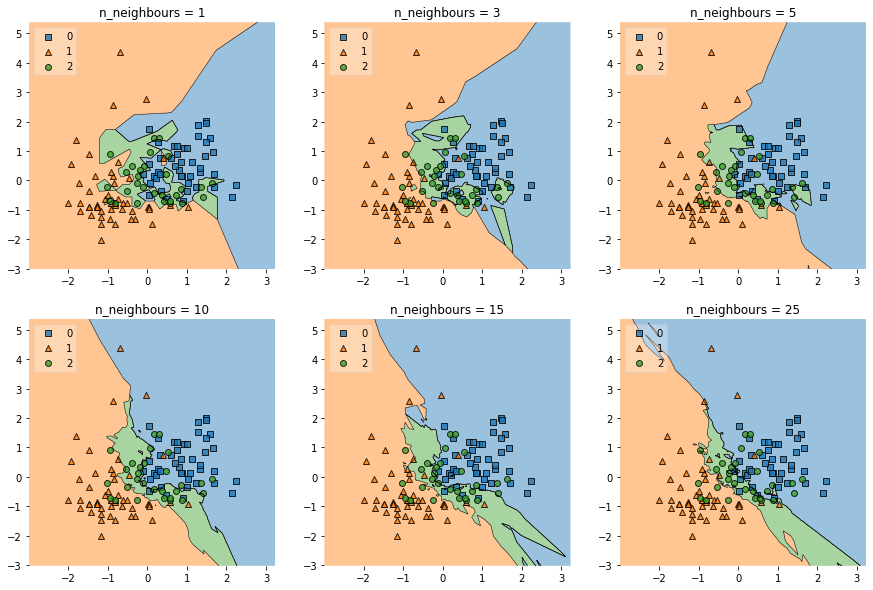

In [54]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools
gs = gridspec.GridSpec(2, 3)

fig = plt.figure(figsize=(15,10))

labels = ['n_neighbours = 1', 'n_neighbours = 3', 'n_neighbours = 5', 'n_neighbours = 10', 'n_neighbours = 15', 'n_neighbours = 25']
for model, lab, grd in zip(models,
                         labels,
                         list(itertools.product([0, 1, 2], repeat=2))[0:6]):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X = X_train_new , y = y_train, clf=model, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Оптимальным вариантом является 10 соседей, так как процент правильных ответов относительно остальных вариаций нормальный, то есть несильно хуже лучших показателей, но при этом решающая поверхность у 10-ти соседей наиболее гладкая, без дыр и островов. Этого нельзя сказать о других n: у 1, 3, 5, 25 видны различные маленькие островки, что плохо, а у 15 оранжевая граница слишком неровная, с маленькими выпуклостями.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

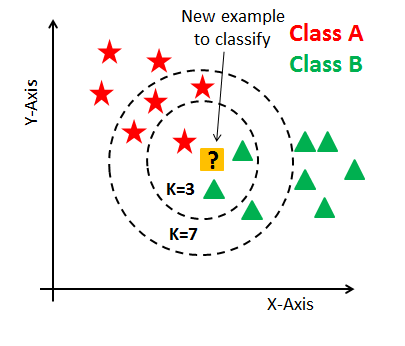

In [58]:
import numpy as np
from collections import Counter 

class KNN:
    def __init__(self, k:int):
        self.k = k
    
    def fit(self, X, y):
      self.X_train = X
      self.y_train = y
      pass
    
    def predict(self, X):
        distances = np.sqrt(((X[:, np.newaxis, :] - self.X_train)**2).sum(axis=2))
        k_nearest = np.argpartition(distances, self.k, axis=1)[:, :self.k]
        classes = np.unique(self.y_train)
        y_pred = classes[np.apply_along_axis(lambda x: np.argmax(np.bincount(x, minlength=len(classes))), axis=1, arr=self.y_train[k_nearest])]
        return y_pred
    pass

In [59]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [60]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [61]:
data = pd.read_csv("https://github.com/crowwhite1/HomeWorkForPythonHSE/raw/main/diamonds.csv")
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [62]:
data.isnull().any().any()

False

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [63]:
data.drop("Unnamed: 0", axis=1, inplace=True)

**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [64]:
import seaborn as sns

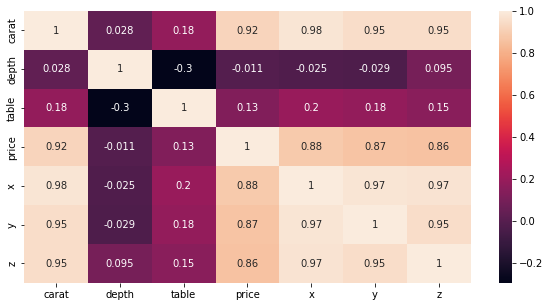

In [65]:
fig = plt.figure(figsize=(10, 5))
sns.heatmap(data.corr(), annot=True)
plt.show()

Из матрицы видно, что больше всего с ценой коррелируют признаки x, y, z и carat. Но больше всего с carat

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [66]:
data = pd.get_dummies(data)

In [67]:
data

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,0,1,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,0,...,0,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [68]:
X = data.drop('price', axis=1)
y = data[['price']]

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [70]:
columns_names = ['carat', 'depth', 'table', 'x', 'y', 'z']
relevant_columns_train = X_train[columns_names]
scaler = preprocessing.StandardScaler().fit(relevant_columns_train.values)
relevant_columns_train = scaler.transform(relevant_columns_train.values)
X_train[columns_names] = relevant_columns_train
X_train.reset_index(drop=True)

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-0.208023,-1.846077,3.387044,0.015521,0.098324,-0.154750,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.503236,-0.591952,-0.659528,-0.350157,-0.326258,-0.393978,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0.614356,-1.428035,0.239710,0.898500,0.834843,0.661442,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,-0.186936,-0.661626,-0.209909,0.060116,0.089659,0.000045,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.861708,0.731846,-0.209909,-1.001243,-0.932804,-0.886508,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37753,2.723020,-0.452605,-0.659528,2.289861,2.160578,2.124959,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
37754,1.120435,0.453151,-1.558767,1.166070,1.155446,1.210261,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
37755,-0.988228,-0.452605,-0.659528,-1.135027,-1.088773,-1.139809,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
37756,-1.199095,0.522825,0.239710,-1.616652,-1.548014,-1.519760,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)
MSE_train = mse(y_train, predictions_train)
MSE_test = mse(y_test, predictions_test)
MSE_train, MSE_test

(1269940.67234433, 149734530.3589966)

**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [73]:
model_coefs = pd.DataFrame()
model_coefs['features'] = X_train.columns
model_coefs['coefficients'] = model.coef_.T
model_coefs

,features,coefficients
0,carat,5317.616052
1,depth,-91.807221
2,table,-69.393844
3,x,-1111.430394
4,y,13.329451
5,z,-33.683665
6,cut_Fair,-578.288162
7,cut_Good,-3.726912
8,cut_Ideal,245.201028
9,cut_Premium,183.366322


У признаков carat и x коэффициенты напорядок превышают коэффициенты других вещественных признаков. Также высокие коэффициенты у признаков, полученных в результате OneHot-кодирования.

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [74]:
from sklearn.linear_model import Lasso, Ridge

In [75]:
model_Lasso = Lasso(alpha=10)
model_Lasso.fit(X_train, y_train)
predictions_train_Lasso = model_Lasso.predict(X_train)
predictions_test_Lasso = model_Lasso.predict(X_test)
MSE_train_Lasso = mse(y_train, predictions_train_Lasso)
MSE_test_Lasso = mse(y_test, predictions_test_Lasso)
MSE_train_Lasso, MSE_test_Lasso

(1306777.064370952, 144502916.21139547)

In [76]:
model_Lasso_coefs = pd.DataFrame()
model_Lasso_coefs['features'] = X_train.columns
model_Lasso_coefs['coefficients'] = model_Lasso.coef_.T
model_Lasso_coefs

,features,coefficients
0,carat,4843.647788
1,depth,-102.071364
2,table,-88.714160
3,x,-700.476502
4,y,-0.000000
5,z,-32.554591
6,cut_Fair,-431.141082
7,cut_Good,-42.061870
8,cut_Ideal,75.386059
9,cut_Premium,0.000000


In [77]:
model_Ridge = Ridge(alpha=10)
model_Ridge.fit(X_train, y_train)
predictions_train_Ridge = model_Ridge.predict(X_train)
predictions_test_Ridge = model_Ridge.predict(X_test)
MSE_train_Ridge = mse(y_train, predictions_train_Ridge)
MSE_test_Ridge = mse(y_test, predictions_test_Ridge)
MSE_train_Ridge, MSE_test_Ridge

(1270096.458460342, 143907373.7715492)

In [78]:
model_Ridge_coefs = pd.DataFrame()
model_Ridge_coefs['features'] = X_train.columns
model_Ridge_coefs['coefficients'] = model_Ridge.coef_.T
model_Ridge_coefs

,features,coefficients
0,carat,5278.683435
1,depth,-90.372828
2,table,-69.811018
3,x,-1070.237084
4,y,10.834394
5,z,-37.164665
6,cut_Fair,-580.304364
7,cut_Good,-3.941300
8,cut_Ideal,246.045914
9,cut_Premium,183.426443


В обоих случаях сильно уменьшились веса при OneHot признаках, но при этом почти не изменились веса при вещественных признаках, из чего делается вывод, что проблема мультиколлинеарности была несильной.

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [79]:
alpha = [0.1, 1, 10, 100, 200]
norms_Lasso = []
norms_Ridge = []

for coef in alpha:
    model_Lasso_new = Lasso(alpha=coef)
    model_Lasso_new.fit(X_train, y_train)
    norms_Lasso.append(np.linalg.norm(model_Lasso_new.coef_))
    
    model_Ridge_new = Ridge(alpha=coef)
    model_Ridge_new.fit(X_train, y_train)
    norms_Ridge.append(np.linalg.norm(model_Ridge_new.coef_))


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.410e+07, tolerance: 5.997e+07
  model = cd_fast.enet_coordinate_descent(


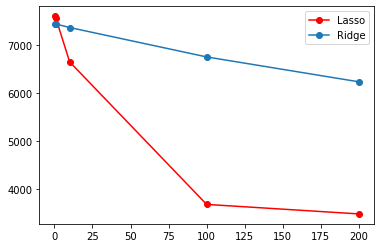

In [87]:
plt.plot(alpha,norms_Lasso, 'r', marker='o', label='Lasso')
plt.plot(alpha,norms_Ridge, marker='o', label='Ridge')
plt.legend()
plt.show()

Метод Лассо более агрессивно снижает веса признаков. При этом используют его чаще для их отбора, потому что у него есть свойство занулять некоторые признаки, соответственно, их можно удалить.

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [81]:
from sklearn.linear_model import LassoCV
model_LassoCV = LassoCV(alphas=alpha, cv=5)
model_LassoCV.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:1568: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=[0.1, 1, 10, 100, 200], cv=5)

In [82]:
pd.DataFrame(model_LassoCV.mse_path_)

,0,1,2,3,4
0,2.381531e+06,2.533132e+06,2.394991e+06,2.409850e+06,2.434591e+06
1,2.170755e+06,2.334243e+06,2.197116e+06,2.194197e+06,2.231534e+06
2,1.245446e+06,1.417628e+06,1.276859e+06,1.272441e+06,1.337939e+06
3,1.204656e+06,1.380141e+06,1.241492e+06,1.238491e+06,1.305639e+06
4,1.204072e+06,1.379970e+06,1.241222e+06,1.240984e+06,1.305553e+06


In [83]:
mean_mses = np.mean(pd.DataFrame(model_LassoCV.mse_path_), axis=1)
mean_mses

0    2.430819e+06
1    2.225569e+06
2    1.310063e+06
3    1.274084e+06
4    1.274360e+06
dtype: float64

In [84]:
alphas_res = pd.DataFrame()
alphas_res['alpha'] = model_LassoCV.alphas_
alphas_res['MSE'] = mean_mses 
alphas_res

,alpha,MSE
0,200.0,2.430819e+06
1,100.0,2.225569e+06
2,10.0,1.310063e+06
3,1.0,1.274084e+06
4,0.1,1.274360e+06


Получается, что alpha = 1 - наиболее эффективное.

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [85]:
model_Lasso_final = Lasso(alpha=1)
model_Lasso_final.fit(X_train, y_train)
model_Lasso_final_coefs = pd.DataFrame()
model_Lasso_final_coefs['features'] = X_train.columns
model_Lasso_final_coefs['coefficients'] = model_Lasso_final.coef_.T
model_Lasso_final_coefs

,features,coefficients
0,carat,5270.495433
1,depth,-93.223499
2,table,-71.266241
3,x,-1060.257937
4,y,0.000000
5,z,-32.139719
6,cut_Fair,-704.028705
7,cut_Good,-147.464171
8,cut_Ideal,88.303947
9,cut_Premium,23.026126


Модель занулила три признака: y, cut_Very Good, color_G. Они оказались неинформативными. Наибольший же вес имеют признаки carat и clarity_I1. При этом карат положительно влияет на цену, потому что это один из самых важных показателей, характеризующих вес бриллианта. Соответственно, при даже небольшом увеличении веса цена растет крайне сильно. clarity_I1 - влияет наоборот отрицательно на цену, потому что это показатель чистоты бриллианта, а категория I1 является переходной, когда на бриаллианте есть видимые включения, влияющие на прозрачность и яркость. Соответственно, при наличии такого признака цена бриллианта сильно падает.

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [88]:
predictions_test_Lasso_final = model_Lasso_final.predict(X_test)
MSE_test_Lasso_final = mse(y_test, predictions_test_Lasso_final)
MSE_test, MSE_test_Lasso_final, MSE_test-MSE_test_Lasso_final

(149734530.3589966, 149828778.91801837, -94248.55902177095)

Стандартная модель, без использования Lasso, оказалась лучше (имеет меньшую ошибку). Это может быть связано с тем, что появившиеся после OneHot кодирования бинарные признаки в действительности имеют большой вес и обычная модель подобное позволяет. А регуляризация же не дала установить этим признакам большие веса в силу своего механизма работы, поэтому и показатель MSE оказался хуже